In [1]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pydot
import pydot
from IPython.core.display import Image 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.getcwd()

'/content'

In [5]:
path = './drive/MyDrive/DSL/[22-1] 정규세션/data'   
os.chdir(path)

In [6]:
import os
os.getcwd()

'/content/drive/MyDrive/DSL/[22-1] 정규세션/data'

In [7]:
diabetes=pd.read_csv('diabetes.csv')
diabetes.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [8]:
feature_names=diabetes.columns[:-1]

In [9]:
class_names=diabetes.columns[-1]

In [10]:
print(feature_names)
print(class_names) 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Outcome


In [11]:
X=diabetes.copy().drop(['Outcome'],axis=1)
X.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [12]:
y=diabetes['Outcome'].copy()
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

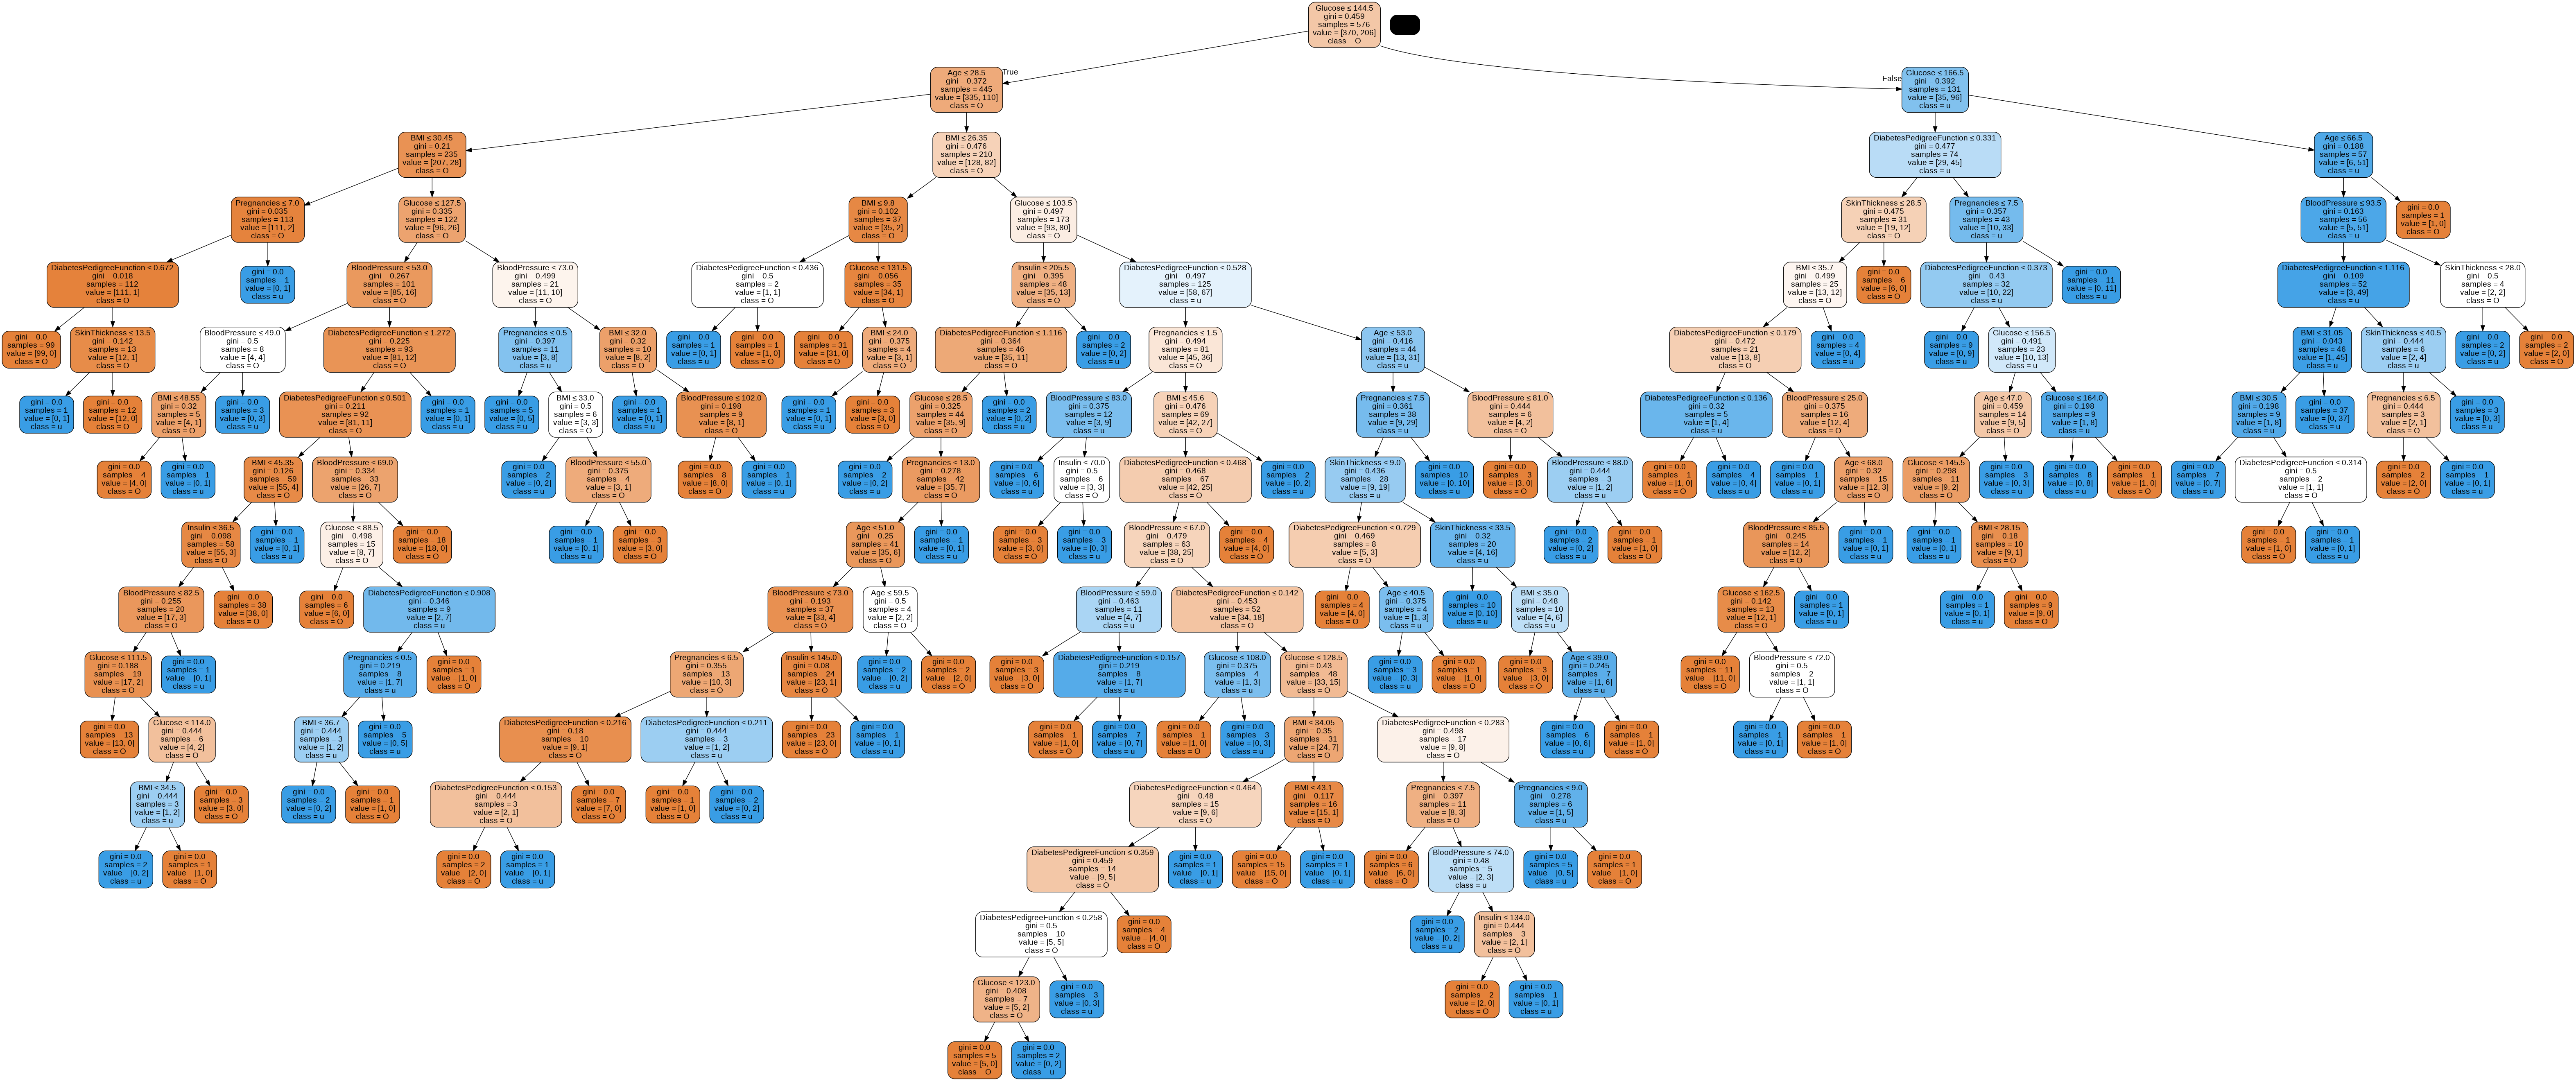

In [18]:
# Pruning 되기 전 
clf1 = DecisionTreeClassifier(random_state=0)
tree_nottuned = clf1.fit(X_train, y_train)
draw_decision_tree(tree_nottuned, feature_names, class_names)

# Cost complexity pruning(사후가지치기)

In [19]:
import matplotlib.pyplot as plt

In [20]:
clf = DecisionTreeClassifier(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)

# alphas, inpurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

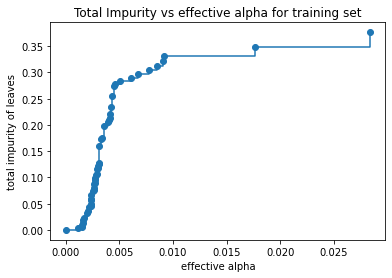

In [21]:
fig, ax = plt.subplots() 
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [22]:
from sklearn.metrics import accuracy_score

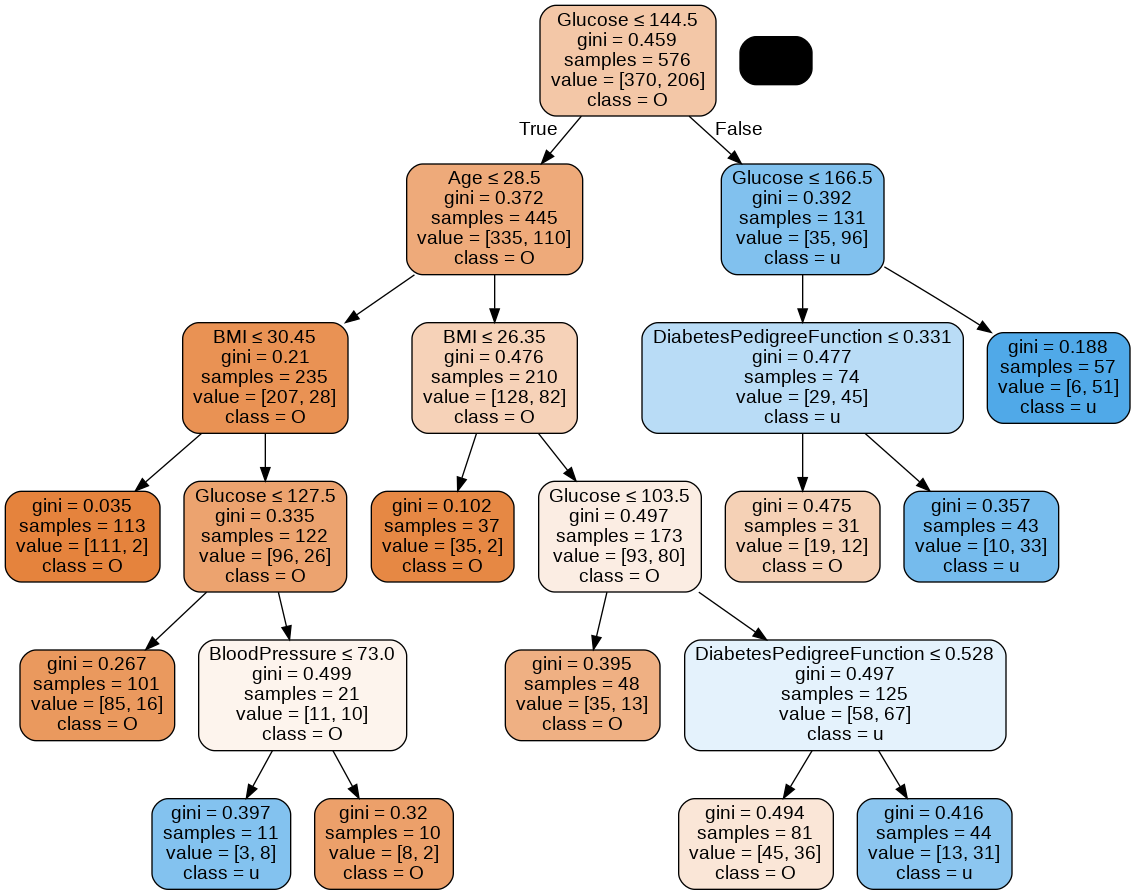

In [24]:
#  ccp_alpha를 0.005로 해보기
clf2 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.005)
clf2 = clf2.fit(X_train, y_train)
draw_decision_tree(clf2, feature_names, class_names)

# Accuracy 비교

In [25]:
#cost copliexity before pruning accuracy
y_pred=clf1.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.71875


In [26]:
#cost copliexity pruning accuracy
y_pred=clf2.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.7760416666666666


가지치기전은 0.718, 사후가지치기 정확도는 0.776인 것을 통해 정확도는 pruning을 통해 0.06정도 올라간 것을 알 수 있다.

# hyper parameter 조정해본 트리

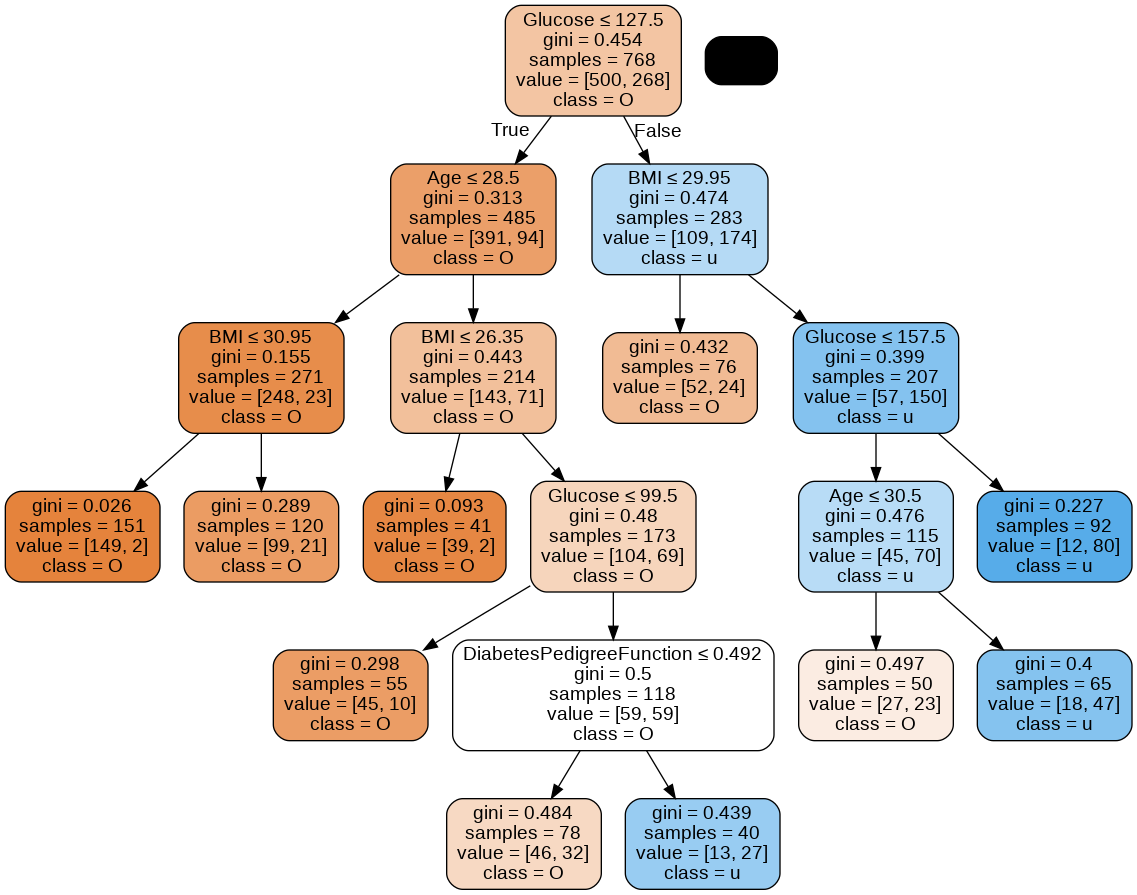

In [27]:
clf3 = DecisionTreeClassifier(min_samples_leaf = 40, max_leaf_nodes = 10) 
tree = clf3.fit(X, y)
draw_decision_tree(tree, feature_names, class_names)

In [28]:
#hyperparameter tuning accuracy
y_pred=clf3.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.7864583333333334


min_samples_leaf = 40, max_leaf_nodes = 10 로 hyperparameter를 조정하였더니 정확도는 0.786으로 더 올라간 것을 알 수 있다.